In [1]:
import datatable as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

Feature Scaling

In [2]:
class Scaler():
    '''
    特征缩放器
    输入数据格式为n维array,axis为按哪一维度缩放默认为0
    min_max_norm(self): min-max归一化转为[0,1]区间
    mean_norm(self): mean归一化转为[-1,1]区间
    standardization(self): 0-1标准化
    unit_len(self): 缩放至单位长度
    返回array
    
    Feature scaler
    The input data format is n-dim array and the dimension by which the axis is scaled Default is 0
    Min_max_norm (self): min-max normalized to [0,1] interval. 
    Mean_norm (self): mean normalized to [-1,1] interval. 
    Standardization (self): 0-1 standardization. 
    Unit_len (self): scaling to unit length. 
    Return array
    '''
    def __init__(self,data,axis = 0):
        self.data = data
        self.axis = axis
        
    def min_max_norm(self):
        x = self.data
        x_nor = (x - x.min(axis = self.axis)) / (x.max(axis = self.axis) - x.min(axis = self.axis))
        return x_nor
    
    def mean_norm(self):
        x = self.data
        x_nor = (x - x.mean(axis = self.axis)) / (x.max(axis = self.axis) - x.min(axis = self.axis))
        return x_nor
    
    def standardization(self):
        x = self.data
        x_std = (x - x.mean(axis = self.axis)) / (x.std(axis = self.axis))
        return x_std
    
    def unit_len(self):
        x = self.data
        x_len = np.shape(x)[self.axis]
        x_unit = x / x_len
        return x_unit

In [3]:
ex_a = Scaler(np.array([[1,3],[4,1],[2,9],[3,8]]))
ex_a.unit_len()

array([[0.25, 0.75],
       [1.  , 0.25],
       [0.5 , 2.25],
       [0.75, 2.  ]])

In [4]:
ex_a.min_max_norm()

array([[0.        , 0.25      ],
       [1.        , 0.        ],
       [0.33333333, 1.        ],
       [0.66666667, 0.875     ]])

In [5]:
ex_a.mean_norm()

array([[-0.5       , -0.28125   ],
       [ 0.5       , -0.53125   ],
       [-0.16666667,  0.46875   ],
       [ 0.16666667,  0.34375   ]])

In [6]:
ex_a.standardization()

array([[-1.34164079, -0.67269158],
       [ 1.34164079, -1.27063966],
       [-0.4472136 ,  1.12115264],
       [ 0.4472136 ,  0.8221786 ]])

Binning

In [19]:
ex_b = sorted(np.random.normal(30,20,size = 15))
ex_b = list(map(round,ex_b))

In [20]:
ex_b = pd.DataFrame(ex_b,columns= ['age'])
ex_b = ex_b[ex_b['age'] > 0]

In [21]:
ex_b['give_seat'] = pd.cut(ex_b['age'], bins=[0,11,55,100], labels=[1,0,1], ordered= False)#指定分组边界和labels 重复label ordered = False
ex_b['Equal distance'] = pd.cut(ex_b['age'],labels=['low','mid','high'], bins= 3)#Equal Distance
ex_b['Equal frequency'] = pd.qcut(ex_b['age'], q= 3,labels=['A','B','C'])#Equal Frequency
ex_b

,age,give_seat,Equal distance,Equal frequency
1,11,1,low,A
2,17,0,low,A
3,20,0,low,A
4,26,0,low,A
5,31,0,mid,A
6,35,0,mid,B
7,36,0,mid,B
8,37,0,mid,B
9,37,0,mid,B
10,39,0,mid,C


In [23]:
from category_encoders import OneHotEncoder
ex_encoder = OneHotEncoder(cols=['Equal distance','Equal frequency'],handle_missing='value', 
                                handle_unknown='value',return_df= True, use_cat_names= True).fit(ex_b)
ex_c = ex_encoder.transform(ex_b)
ex_c

/home/liaoqing/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,give_seat,Equal distance_low,Equal distance_mid,Equal distance_high,Equal frequency_A,Equal frequency_B,Equal frequency_C
1,11,1,1,0,0,1,0,0
2,17,0,1,0,0,1,0,0
3,20,0,1,0,0,1,0,0
4,26,0,1,0,0,1,0,0
5,31,0,0,1,0,1,0,0
6,35,0,0,1,0,0,1,0
7,36,0,0,1,0,0,1,0
8,37,0,0,1,0,0,1,0
9,37,0,0,1,0,0,1,0
10,39,0,0,1,0,0,0,1


In [27]:
ex_b = sorted(np.random.normal(30,20,size = 1000))
ex_b = list(map(round,ex_b))
ex_b = pd.DataFrame(ex_b,columns= ['age'])
ex_b = ex_b[ex_b['age'] > 0]
ex_b['give_seat'] = pd.cut(ex_b['age'], bins=[0,11,55,100], labels=[1,0,1], ordered= False)#指定分组边界和labels 重复label ordered = False
ex_b['Equal distance'] = pd.cut(ex_b['age'],labels=['low','mid','high'], bins= 3)#Equal Distance
ex_b['Equal frequency'] = pd.qcut(ex_b['age'], q= 3,labels=['A','B','C'])#Equal Frequency

<AxesSubplot:>

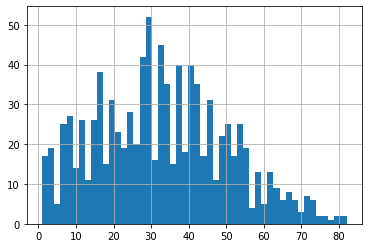

In [28]:
ex_b['age'].hist(bins = 50)

<AxesSubplot:>

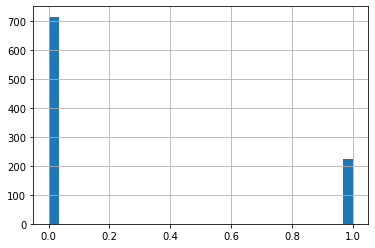

In [29]:
ex_b['give_seat'].hist(bins = 30)

<AxesSubplot:>

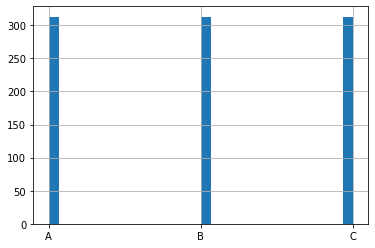

In [30]:
ex_b['Equal frequency'].hist(bins = 30)

<AxesSubplot:>

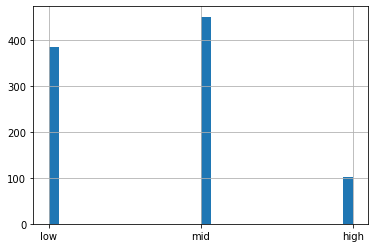

In [31]:
ex_b['Equal distance'].hist(bins = 30)

Interaction Feature & Polynomial Feature

In [32]:
X = np.random.randn(500).reshape(-1,1)
y = X[:,0] * 3 + np.random.randn(500)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [33]:
model = LinearRegression().fit(X_train,Y_train)
pred = model.predict(X_test)

In [34]:
X2 = np.random.randn(500).reshape(-1,1)
y2 = 2 * np.sin(X2[:,0]) + np.random.rand(500)
poly = PolynomialFeatures(degree=5, include_bias=False)#原来-1,1 现在加入x**2,x**3...计算完了合并
poly.fit(X2)
X_poly = poly.transform(X2)
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_poly,y2,test_size = 0.3, random_state = 42)

In [35]:
X_poly.shape

(500, 5)

In [36]:
model2 = LinearRegression().fit(X_train2,Y_train2)
pred2 = model2.predict(X_test2)

In [37]:
pred2.shape

(150,)

In [38]:
sorted_index = X_test2[:,0].argsort()#返回排序后索引
sorted_X_test2 = X_test2[sorted_index]
sorted_pred2 = pred2[sorted_index]

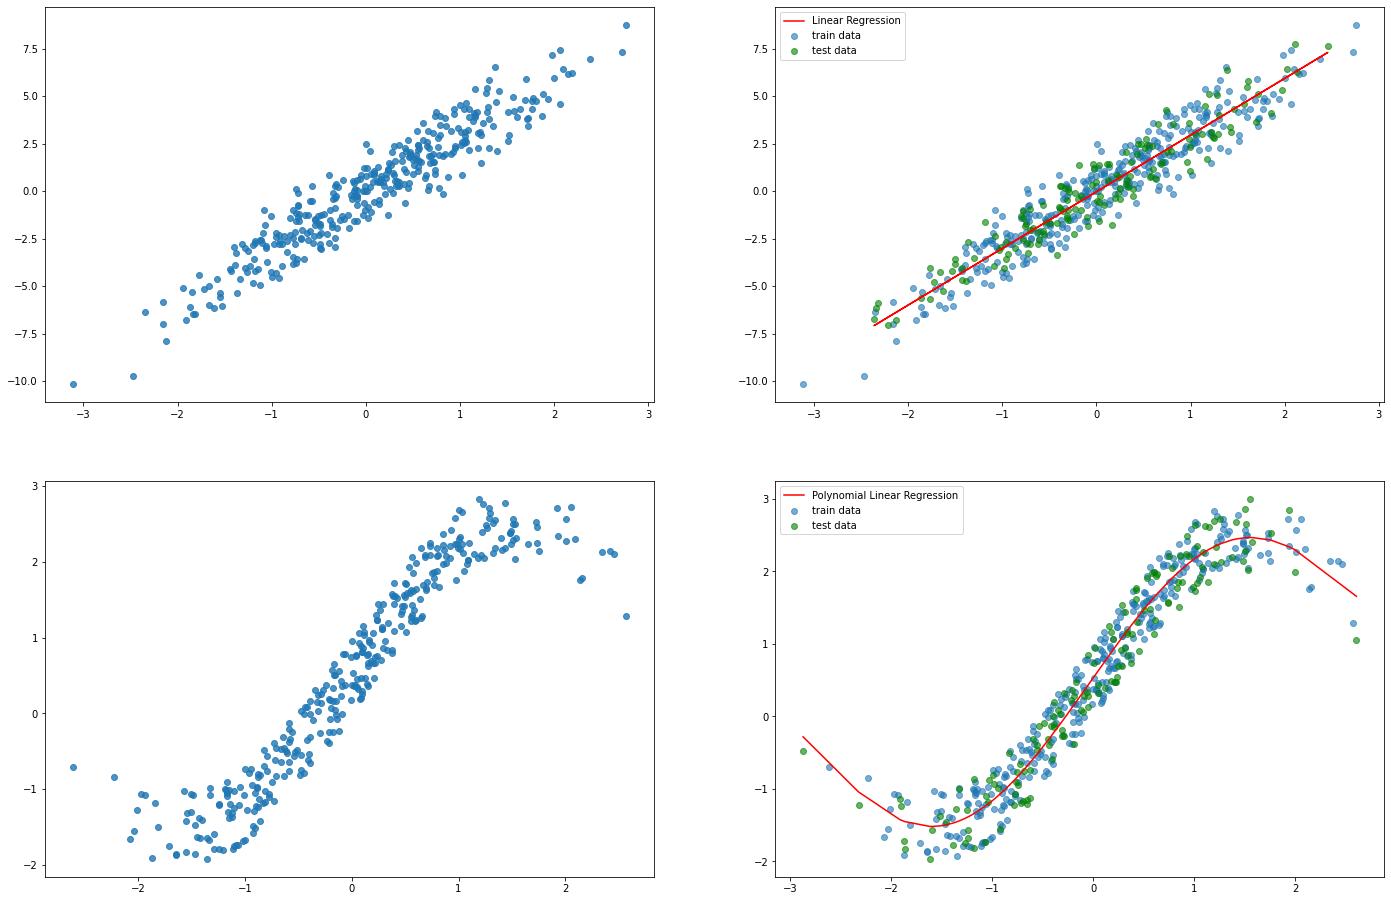

In [39]:
plt1 = plt.figure(figsize=(24,16))

ax1 = plt1.add_subplot(2,2,1)
ax1.scatter(X_train[:,0],Y_train,alpha = 0.8)

ax2 = plt1.add_subplot(2,2,2)
ax2.scatter(X_train[:,0],Y_train, alpha = 0.6,label = "train data")
ax2.scatter(X_test[:,0],Y_test, alpha = 0.6,label = "test data", color = "green")
ax2.plot(X_test[:,0],pred,color = 'red',label = 'Linear Regression')
ax2.legend(loc='best')

ax3 = plt1.add_subplot(2,2,3)
ax3.scatter(X_train2[:,0],Y_train2,alpha = 0.8)

ax4 = plt1.add_subplot(2,2,4)
ax4.scatter(X_train2[:,0],Y_train2, alpha = 0.6,label = "train data")
ax4.scatter(X_test2[:,0],Y_test2, alpha = 0.6,label = "test data", color = "green")
ax4.plot(sorted_X_test2[:,0],sorted_pred2,color = 'red',label = 'Polynomial Linear Regression')
ax4.legend(loc='best')

Nonlinear Transformation

In [40]:
rnd = np.random.RandomState(0)  
#均值0方差1的正态分布  
X_org = rnd.normal(size=(1000, 3))  
w = rnd.normal(size=3)  
#泊松分布, lam和size根据传入array决定  
X = rnd.poisson(10 * np.exp(X_org))  
y = np.dot(X_org, w)  

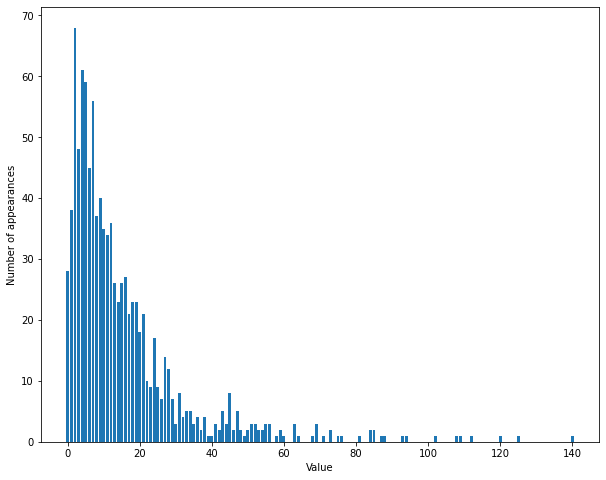

In [41]:
bins = np.bincount(X[:, 0])
plt.figure(figsize=(10,8))
plt.bar(range(len(bins)), bins)  
plt.ylabel("Number of appearances")  
plt.xlabel("Value")  
plt.show()  

In [42]:
X_log = np.log(X+1)
y_log = np.log(y+1)

/home/liaoqing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


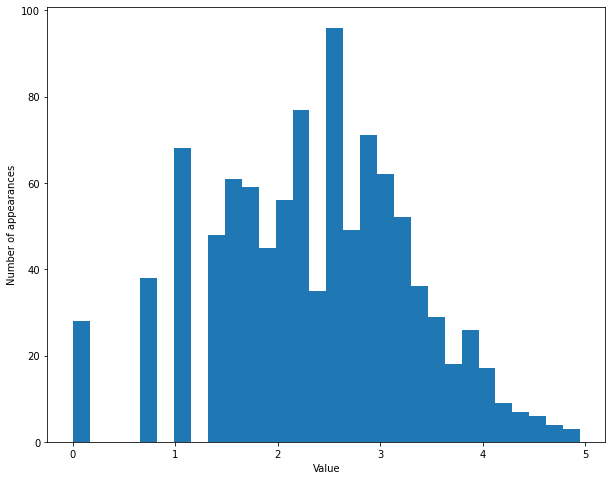

In [43]:
plt.figure(figsize=(10,8))
plt.hist(X_log[:, 0], bins=30)
plt.ylabel("Number of appearances")  
plt.xlabel("Value")  
plt.show()  

序列编码 Ordinal Encoding

In [44]:
# 随机生成一些训练集
category_df = pd.DataFrame(np.array([['Dog',20],['Cat', 30], ['Sheep',19], 
                       ['Horse',23],['Lion',25],['Sheep', 5],['Cat', 22],['Lion', 72],['Horse', 43]]),
             columns = ['Animal','label'])
category_df

,Animal,label
0,Dog,20
1,Cat,30
2,Sheep,19
3,Horse,23
4,Lion,25
5,Sheep,5
6,Cat,22
7,Lion,72
8,Horse,43


In [45]:
from category_encoders import OrdinalEncoder
ord_encoder = OrdinalEncoder(cols=['Animal'], handle_missing='value', 
                             handle_unknown='value',return_df= True).fit(category_df)
ord_encoded_df = ord_encoder.transform(category_df)
ord_encoded_df

/home/liaoqing/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Animal,label
0,1,20
1,2,30
2,3,19
3,4,23
4,5,25
5,3,5
6,2,22
7,5,72
8,4,43


one-hot Encoding

In [46]:
from category_encoders import OneHotEncoder
one_hot_encoder = OneHotEncoder(cols=['Animal'], handle_missing='value', 
                                handle_unknown='value',return_df= True, use_cat_names= True).fit(category_df)
one_hot_encoded_df = one_hot_encoder.transform(category_df)
one_hot_encoded_df

/home/liaoqing/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Animal_Dog,Animal_Cat,Animal_Sheep,Animal_Horse,Animal_Lion,label
0,1,0,0,0,0,20
1,0,1,0,0,0,30
2,0,0,1,0,0,19
3,0,0,0,1,0,23
4,0,0,0,0,1,25
5,0,0,1,0,0,5
6,0,1,0,0,0,22
7,0,0,0,0,1,72
8,0,0,0,1,0,43
